## Spotify recommendation model

In [156]:
##!conda install -c conda-forge spotipy

In [157]:
import config 

In [158]:
import spotipy
import pandas as pd
import json
from spotipy.oauth2 import SpotifyClientCredentials


#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))



results = sp.search(q="daddy cool",limit=5,market="GB")
#q stands for query
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=daddy+cool&type=track&market=GB&offset=0&limit=5',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/54R6Y0I7jGUCveDTtI21nb'},
       'href': 'https://api.spotify.com/v1/artists/54R6Y0I7jGUCveDTtI21nb',
       'id': '54R6Y0I7jGUCveDTtI21nb',
       'name': 'Boney M.',
       'type': 'artist',
       'uri': 'spotify:artist:54R6Y0I7jGUCveDTtI21nb'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/1KQUrny9y5zGpktF6hAGd4'},
     'href': 'https://api.spotify.com/v1/albums/1KQUrny9y5zGpktF6hAGd4',
     'id': '1KQUrny9y5zGpktF6hAGd4',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b273dafd1cd6e9537ec8463ea691',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e02dafd1cd6e9537ec8463ea691',
       'width': 300},
      {'height': 64,
       'url': 'https://i.sc

## Importing libraries

In [73]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [74]:
spotify_playlist_df = pd.read_csv('Genres_playlist.csv')


In [75]:
spotify_playlist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.634,0.824,2,-3.394,0,0.0470,0.090800,0.071100,0.1190,0.371,137.959,audio_features,31nfdEooLEq7dn3UMcIeB5,spotify:track:31nfdEooLEq7dn3UMcIeB5,https://api.spotify.com/v1/tracks/31nfdEooLEq7...,https://api.spotify.com/v1/audio-analysis/31nf...,178156,4
1,0.875,0.518,2,-8.388,1,0.0551,0.063800,0.009950,0.1250,0.370,126.089,audio_features,0h3Xy4V4apMraB5NuM8U7Z,spotify:track:0h3Xy4V4apMraB5NuM8U7Z,https://api.spotify.com/v1/tracks/0h3Xy4V4apMr...,https://api.spotify.com/v1/audio-analysis/0h3X...,213364,4
2,0.611,0.757,6,-3.546,1,0.0300,0.002570,0.000000,0.0580,0.279,126.963,audio_features,3bK1zVFBKIzYjmptmI4NsJ,spotify:track:3bK1zVFBKIzYjmptmI4NsJ,https://api.spotify.com/v1/tracks/3bK1zVFBKIzY...,https://api.spotify.com/v1/audio-analysis/3bK1...,155905,4
3,0.943,0.558,2,-4.911,1,0.0568,0.002600,0.000002,0.0937,0.606,104.983,audio_features,4xhsWYTOGcal8zt0J161CU,spotify:track:4xhsWYTOGcal8zt0J161CU,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411,4
4,0.628,0.523,11,-8.307,0,0.0946,0.701000,0.002740,0.2190,0.416,169.982,audio_features,5mjYQaktjmjcMKcUIcqz4s,spotify:track:5mjYQaktjmjcMKcUIcqz4s,https://api.spotify.com/v1/tracks/5mjYQaktjmjc...,https://api.spotify.com/v1/audio-analysis/5mjY...,172965,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,0.558,0.731,7,-3.801,1,0.0430,0.069700,0.000000,0.2330,0.664,78.194,audio_features,7FKAVg9SA7QYLxdVRLnKjd,spotify:track:7FKAVg9SA7QYLxdVRLnKjd,https://api.spotify.com/v1/tracks/7FKAVg9SA7QY...,https://api.spotify.com/v1/audio-analysis/7FKA...,184173,4
2449,0.576,0.852,0,-4.689,1,0.0301,0.000139,0.012900,0.1020,0.502,97.980,audio_features,5Z48gU2EpgzhECkuuXp4Ev,spotify:track:5Z48gU2EpgzhECkuuXp4Ev,https://api.spotify.com/v1/tracks/5Z48gU2Epgzh...,https://api.spotify.com/v1/audio-analysis/5Z48...,183040,4
2450,0.629,0.845,1,-3.438,1,0.0544,0.014500,0.000001,0.1130,0.461,109.966,audio_features,0XgOhyJWH5UVWyV7farWDr,spotify:track:0XgOhyJWH5UVWyV7farWDr,https://api.spotify.com/v1/tracks/0XgOhyJWH5UV...,https://api.spotify.com/v1/audio-analysis/0XgO...,185133,4
2451,0.657,0.657,10,-6.301,0,0.0292,0.161000,0.000000,0.1100,0.730,140.102,audio_features,2Fw1OMnTMDMvq27b4GZMed,spotify:track:2Fw1OMnTMDMvq27b4GZMed,https://api.spotify.com/v1/tracks/2Fw1OMnTMDMv...,https://api.spotify.com/v1/audio-analysis/2Fw1...,158356,4


In [76]:
spotify_playlist_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [77]:
spotify_playlist_df['track_href']

0       https://api.spotify.com/v1/tracks/31nfdEooLEq7...
1       https://api.spotify.com/v1/tracks/0h3Xy4V4apMr...
2       https://api.spotify.com/v1/tracks/3bK1zVFBKIzY...
3       https://api.spotify.com/v1/tracks/4xhsWYTOGcal...
4       https://api.spotify.com/v1/tracks/5mjYQaktjmjc...
                              ...                        
2448    https://api.spotify.com/v1/tracks/7FKAVg9SA7QY...
2449    https://api.spotify.com/v1/tracks/5Z48gU2Epgzh...
2450    https://api.spotify.com/v1/tracks/0XgOhyJWH5UV...
2451    https://api.spotify.com/v1/tracks/2Fw1OMnTMDMv...
2452    https://api.spotify.com/v1/tracks/5waGccg9kVLj...
Name: track_href, Length: 2453, dtype: object

In [78]:
categorical_columns = spotify_playlist_df.select_dtypes(include=['object']).columns
categorical_columns


Index(['type', 'id', 'uri', 'track_href', 'analysis_url'], dtype='object')

In [79]:
numerical_spotify_pl = spotify_playlist_df.drop(categorical_columns, axis=1)

### Numerical values df with id

In [80]:
numerical_spotify_pl

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.634,0.824,2,-3.394,0,0.0470,0.090800,0.071100,0.1190,0.371,137.959,178156,4
1,0.875,0.518,2,-8.388,1,0.0551,0.063800,0.009950,0.1250,0.370,126.089,213364,4
2,0.611,0.757,6,-3.546,1,0.0300,0.002570,0.000000,0.0580,0.279,126.963,155905,4
3,0.943,0.558,2,-4.911,1,0.0568,0.002600,0.000002,0.0937,0.606,104.983,138411,4
4,0.628,0.523,11,-8.307,0,0.0946,0.701000,0.002740,0.2190,0.416,169.982,172965,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,0.558,0.731,7,-3.801,1,0.0430,0.069700,0.000000,0.2330,0.664,78.194,184173,4
2449,0.576,0.852,0,-4.689,1,0.0301,0.000139,0.012900,0.1020,0.502,97.980,183040,4
2450,0.629,0.845,1,-3.438,1,0.0544,0.014500,0.000001,0.1130,0.461,109.966,185133,4
2451,0.657,0.657,10,-6.301,0,0.0292,0.161000,0.000000,0.1100,0.730,140.102,158356,4


### Num. description

In [81]:
numerical_spotify_pl.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.00000,2453.000000,2453.000000
mean,0.646314,0.644205,5.066449,-7.456975,0.573991,0.081941,0.294303,0.075259,0.186209,0.570050,123.82009,218639.548716,3.906645
std,0.154620,0.225756,3.650972,4.167803,0.494596,0.081208,0.295252,0.210121,0.150014,0.236302,28.90535,83009.098291,0.346046
min,0.147000,0.007560,0.000000,-28.888000,0.000000,0.023800,0.000007,0.000000,0.021300,0.034400,49.68900,60000.000000,1.000000
25%,0.541000,0.519000,1.000000,-8.940000,0.000000,0.037500,0.039200,0.000000,0.096100,0.394000,101.38200,169507.000000,4.000000
50%,0.660000,0.695000,5.000000,-6.212000,1.000000,0.049900,0.183000,0.000017,0.127000,0.578000,124.00400,201545.000000,4.000000
75%,0.765000,0.812000,8.000000,-4.685000,1.000000,0.083400,0.500000,0.003960,0.233000,0.763000,139.99500,240880.000000,4.000000
max,0.971000,0.998000,11.000000,0.792000,1.000000,0.777000,0.995000,0.964000,0.991000,0.977000,209.62700,824133.000000,5.000000


In [82]:
X = numerical_spotify_pl

### DF scaling

In [83]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
#display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.079656,0.796577,-0.840071,0.975047,-1.160762,-0.430350,-0.689393,-0.019799,-0.448109,-0.842526,0.489245,-0.487800,0.269831
1,1.479320,-0.559144,-0.840071,-0.223431,0.861503,-0.330587,-0.780859,-0.310880,-0.408104,-0.846759,0.078510,-0.063567,0.269831
2,-0.228438,0.499736,0.255751,0.938570,0.861503,-0.639731,-0.988283,-0.358244,-0.854820,-1.231939,0.108753,-0.755909,0.269831
3,1.919197,-0.381926,-0.840071,0.610992,0.861503,-0.309648,-0.988181,-0.358233,-0.616794,0.152168,-0.651815,-0.966700,0.269831
4,-0.118469,-0.536992,1.625529,-0.203992,-1.160762,0.155916,1.377738,-0.345201,0.218631,-0.652053,1.597328,-0.550348,0.269831


In [84]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2.453000e+03,2.453000e+03,2.453000e+03,2.453000e+03,2.453000e+03,2.453000e+03,2.453000e+03,2.453000e+03,2.453000e+03,2.453000e+03,2.453000e+03,2.453000e+03,2.453000e+03
mean,3.360088e-16,-7.531232e-17,1.158651e-16,-1.042786e-16,-2.317302e-17,1.042786e-16,2.201437e-16,-2.317302e-17,-8.110557e-17,-3.475953e-17,7.241569e-18,-4.634604e-17,3.823548e-16
std,1.000204e+00,1.000204e+00,1.000204e+00,1.000204e+00,1.000204e+00,1.000204e+00,1.000204e+00,1.000204e+00,1.000204e+00,1.000204e+00,1.000204e+00,1.000204e+00,1.000204e+00
min,-3.229952e+00,-2.820629e+00,-1.387982e+00,-5.143092e+00,-1.160762e+00,-7.160938e-01,-9.969657e-01,-3.582437e-01,-1.099514e+00,-2.267268e+00,-2.565138e+00,-1.911500e+00,-8.401304e+00
25%,-6.812526e-01,-5.547140e-01,-1.114026e+00,-3.559015e-01,-1.160762e+00,-5.473574e-01,-8.641942e-01,-3.582437e-01,-6.007920e-01,-7.451733e-01,-7.764191e-01,-5.920142e-01,2.698315e-01
50%,8.853238e-02,2.250471e-01,-1.820414e-02,2.987735e-01,8.615030e-01,-3.946325e-01,-3.770533e-01,-3.581627e-01,-3.947694e-01,3.365161e-02,6.363798e-03,-2.059778e-01,2.698315e-01
75%,7.677544e-01,7.434110e-01,8.036624e-01,6.652283e-01,8.615030e-01,1.797118e-02,6.968248e-01,-3.393936e-01,3.119751e-01,8.167093e-01,5.596960e-01,2.679825e-01,2.698315e-01
max,2.100323e+00,1.567477e+00,1.625529e+00,1.979618e+00,8.615030e-01,8.560714e+00,2.373701e+00,4.230519e+00,5.365865e+00,1.722517e+00,2.969153e+00,7.295790e+00,3.160210e+00


## Clustering the playlist with K-means

### Choosing K with Elbow methow

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 4 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 5 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 6 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 7 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 8 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 9 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 10 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 11 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 12 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 13 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 14 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 15 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 16 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 17 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 18 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 19 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 20 clusters! 



/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

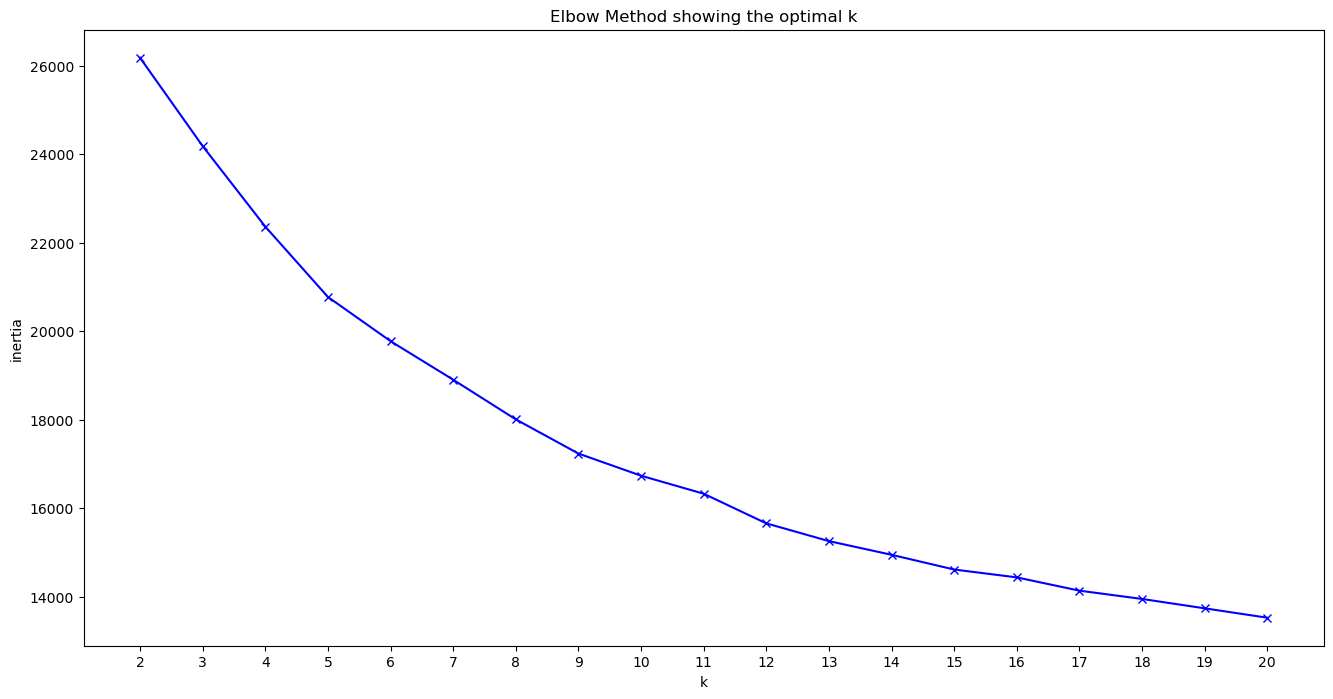

In [85]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Choosing K with Silhouette method

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

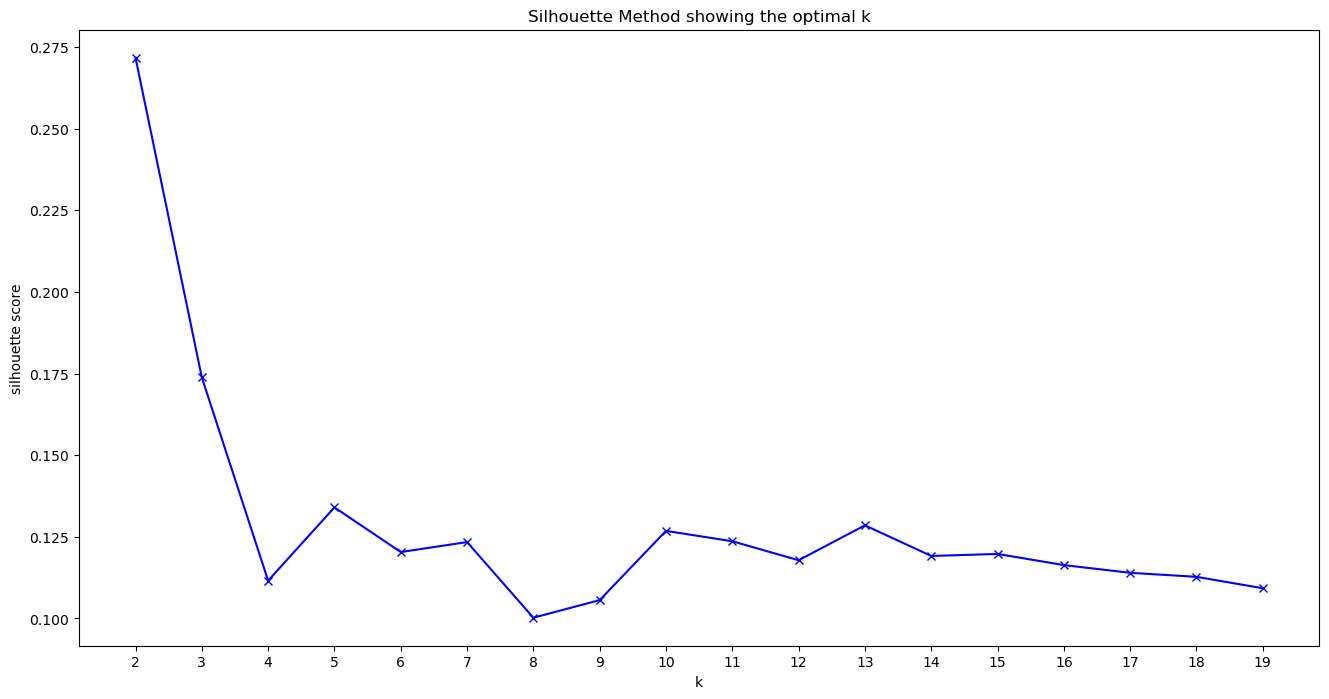

In [86]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init='auto')
    kmeans.fit(X_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

**According to both, Elbow and Silhouette method, the ideal number of clusters to create is 5.

In [87]:
kmeans = KMeans(n_clusters=5, random_state=1234)# DECIDE HOW MANY CLUSTERS
kmeans.fit(X_scaled_df)

/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=1234)

### Saving the model as a pickle file

In [88]:
def save(model, filename = "filename.pickle"):
    with open(filename, "wb") as f:
        pickle.dump(model, f)






def load(filename = "filename.pickle"):
    try:
        with open(filename, "rb") as f:
            return pickle.load(f)
    except FileNotFoundError:
        print("File not found!")

In [89]:
save(kmeans, "kmeans_model5.pickle")

In [90]:
labels = kmeans.labels_
labels

array([0, 1, 1, ..., 1, 0, 1], dtype=int32)

In [91]:
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int32)

In [92]:
kmeans.predict(X_scaled_df)

array([0, 1, 1, ..., 1, 0, 1], dtype=int32)

In [93]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    737
1    935
2    200
3    243
4    338
Name: count, dtype: int64

In [94]:
clusters

array([0, 1, 1, ..., 1, 0, 1], dtype=int32)

In [95]:
#X_df = pd.DataFrame(X)
X["cluster"] = kmeans.labels_
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.634,0.824,2,-3.394,0,0.0470,0.090800,0.071100,0.1190,0.371,137.959,178156,4,0
1,0.875,0.518,2,-8.388,1,0.0551,0.063800,0.009950,0.1250,0.370,126.089,213364,4,1
2,0.611,0.757,6,-3.546,1,0.0300,0.002570,0.000000,0.0580,0.279,126.963,155905,4,1
3,0.943,0.558,2,-4.911,1,0.0568,0.002600,0.000002,0.0937,0.606,104.983,138411,4,1
4,0.628,0.523,11,-8.307,0,0.0946,0.701000,0.002740,0.2190,0.416,169.982,172965,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,0.558,0.731,7,-3.801,1,0.0430,0.069700,0.000000,0.2330,0.664,78.194,184173,4,1
2449,0.576,0.852,0,-4.689,1,0.0301,0.000139,0.012900,0.1020,0.502,97.980,183040,4,1
2450,0.629,0.845,1,-3.438,1,0.0544,0.014500,0.000001,0.1130,0.461,109.966,185133,4,1
2451,0.657,0.657,10,-6.301,0,0.0292,0.161000,0.000000,0.1100,0.730,140.102,158356,4,0


In [96]:
sample_song_cluster = X.sample()
sample_song_cluster

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
903,0.77,0.764,11,-5.168,0,0.0311,0.117,0.0,0.0809,0.621,119.933,228987,4,0


In [97]:
sample_song_no_cluster = sample_song_cluster.drop('cluster', axis=1)

In [98]:
sample_song_scaled = scaler.transform(sample_song_no_cluster)
sample_song_scaled 

array([[ 0.8000983 ,  0.53074887,  1.62552897,  0.54931627, -1.160762  ,
        -0.62618318, -0.60063678, -0.35824366, -0.70213653,  0.21565962,
        -0.1345039 ,  0.12467984,  0.2698315 ]])

In [99]:
song_pred = kmeans.predict(sample_song_no_cluster)
song_cluster = song_pred[0]

### Prediction

In [100]:
X[X['cluster'] == song_cluster]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
5,0.472,0.471,10,-5.692,1,0.0603,0.1510,0.000000,0.1400,0.219,105.029,180304,3,2
7,0.750,0.733,6,-3.180,0,0.0319,0.2560,0.000000,0.1140,0.844,111.018,131872,1,2
9,0.561,0.604,9,-4.409,1,0.0337,0.1990,0.000019,0.1040,0.242,159.920,210689,3,2
39,0.502,0.469,0,-4.939,1,0.0264,0.6430,0.000000,0.2710,0.458,83.123,238939,3,2
199,0.377,0.520,1,-5.255,0,0.1100,0.7470,0.000000,0.0833,0.675,169.792,132632,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,0.527,0.461,7,-5.908,1,0.0269,0.1180,0.000000,0.0831,0.227,128.153,214405,3,2
2401,0.505,0.657,11,-5.240,0,0.0318,0.3730,0.001070,0.1260,0.252,196.000,178520,3,2
2436,0.636,0.592,11,-5.025,1,0.0285,0.1270,0.000000,0.1340,0.266,120.058,214799,3,2
2437,0.518,0.557,1,-4.839,1,0.0332,0.0258,0.000002,0.1560,0.216,111.865,218160,3,2


** The sample song is in cluster number: 2.

### Recommended song

In [101]:
X[X['cluster'] == song_cluster].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
2232,0.414,0.414,5,-8.751,0,0.0288,0.393,0.000159,0.187,0.257,159.711,391320,3,2


### Inertia

In [102]:
kmeans.inertia_

20776.542003212868

In [103]:
kmeans2 = KMeans(n_clusters=5,
                init="k-means++",
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=5,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

20912.01122055024


# Song recommendation implementation

- User input
- Search the ID of the song
- Scale the sample(song)
- Predict the cluster where this song could fall in
- Recommend random song from the same cluster

In [104]:


def search_song():
    # Ask the user to input a song
    user_input = input("Enter a song: ")
    
    results = sp.search(q=user_input,limit=1,market="GB")
    return results



In [105]:

from IPython.display import IFrame

def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

# Try the model!!!!!

In [106]:
song = search_song()
print(song)

Enter a song: murder on the dance floor
{'tracks': {'href': 'https://api.spotify.com/v1/search?query=murder+on+the+dance+floor&type=track&market=GB&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2cBh5lVMg222FFuRU7EfDE'}, 'href': 'https://api.spotify.com/v1/artists/2cBh5lVMg222FFuRU7EfDE', 'id': '2cBh5lVMg222FFuRU7EfDE', 'name': 'Sophie Ellis-Bextor', 'type': 'artist', 'uri': 'spotify:artist:2cBh5lVMg222FFuRU7EfDE'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/68ishLKwqH5oH79kUteEHG'}, 'href': 'https://api.spotify.com/v1/albums/68ishLKwqH5oH79kUteEHG', 'id': '68ishLKwqH5oH79kUteEHG', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273b736151ed1c04f2d41d5f69e', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e02b736151ed1c04f2d41d5f69e', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d00004851b736151ed1c04f2

In [107]:
song_id = song["tracks"]["items"][0]["id"]
song_id

'4tKGFmENO69tZR9ahgZu48'

In [108]:
print('Your song is: ')
play_song(song_id)

Your song is: 


In [109]:
def get_audio_features_from_track(song_id): 
    return sp.audio_features(song_id)

In [110]:
audio_features_sample_song = get_audio_features_from_track(song_id)
audio_features_sample_song

[{'danceability': 0.73,
  'energy': 0.849,
  'key': 1,
  'loudness': -5.281,
  'mode': 0,
  'speechiness': 0.0299,
  'acousticness': 0.00234,
  'instrumentalness': 2.6e-05,
  'liveness': 0.312,
  'valence': 0.887,
  'tempo': 117.31,
  'type': 'audio_features',
  'id': '4tKGFmENO69tZR9ahgZu48',
  'uri': 'spotify:track:4tKGFmENO69tZR9ahgZu48',
  'track_href': 'https://api.spotify.com/v1/tracks/4tKGFmENO69tZR9ahgZu48',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4tKGFmENO69tZR9ahgZu48',
  'duration_ms': 230013,
  'time_signature': 4}]

In [111]:
song_audio_features_df = pd.DataFrame(audio_features_sample_song)
song_audio_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.73,0.849,1,-5.281,0,0.0299,0.00234,0.000026,0.312,0.887,117.31,audio_features,4tKGFmENO69tZR9ahgZu48,spotify:track:4tKGFmENO69tZR9ahgZu48,https://api.spotify.com/v1/tracks/4tKGFmENO69t...,https://api.spotify.com/v1/audio-analysis/4tKG...,230013,4


In [112]:
droping_values = ['analysis_url','id','track_href','type','uri']
features_df = song_audio_features_df.drop(droping_values, axis=1)
features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.73,0.849,1,-5.281,0,0.0299,0.00234,0.000026,0.312,0.887,117.31,230013,4


In [113]:
sample_song_scaled = scaler.transform(features_df)
sample_song_scaled 

array([[ 0.54134706,  0.90733803, -1.11402621,  0.52219814, -1.160762  ,
        -0.64096301, -0.98906221, -0.3581199 ,  0.83869973,  1.34156959,
        -0.22526685,  0.13704245,  0.2698315 ]])

In [114]:
kmeans_model = load("kmeans_model5.pickle")

In [115]:
song_pred = kmeans_model.predict(sample_song_scaled)
song_cluster = song_pred[0]

/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# Song classification 

In [116]:
X[X['cluster'] == song_cluster]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.634,0.824,2,-3.394,0,0.0470,0.0908,0.071100,0.1190,0.371,137.959,178156,4,0
4,0.628,0.523,11,-8.307,0,0.0946,0.7010,0.002740,0.2190,0.416,169.982,172965,4,0
8,0.744,0.789,9,-4.876,0,0.0590,0.0036,0.001440,0.0947,0.866,116.985,185918,4,0
10,0.550,0.500,7,-5.779,0,0.0450,0.2850,0.000000,0.1160,0.351,115.016,167357,4,0
15,0.657,0.914,0,-4.513,0,0.0523,0.0526,0.000006,0.1090,0.502,139.989,147433,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,0.536,0.772,3,-6.027,0,0.0339,0.2060,0.000000,0.1630,0.423,134.019,208209,4,0
2415,0.639,0.713,5,-4.368,0,0.0337,0.0539,0.000000,0.1020,0.717,86.100,161200,4,0
2434,0.661,0.933,1,-2.503,0,0.0656,0.0185,0.000003,0.1570,0.741,123.035,212360,5,0
2443,0.442,0.644,10,-5.787,0,0.0378,0.3470,0.000002,0.1280,0.340,117.379,216573,4,0


# Song recommendation

In [117]:
given_row = X[X['cluster'] == song_cluster].sample()
given_row

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
1245,0.666,0.534,2,-8.495,0,0.0828,0.269,0.000873,0.068,0.392,139.998,192976,4,0


In [118]:
given_row_index = given_row.index
given_row_index.tolist()[0]

1245

In [119]:
row = spotify_playlist_df.iloc[given_row_index.tolist()[0]]
row

danceability                                                    0.666
energy                                                          0.534
key                                                                 2
loudness                                                       -8.495
mode                                                                0
speechiness                                                    0.0828
acousticness                                                    0.269
instrumentalness                                             0.000873
liveness                                                        0.068
valence                                                         0.392
tempo                                                         139.998
type                                                   audio_features
id                                             2q7jpVfCtcuRwcur9nQeuC
uri                              spotify:track:2q7jpVfCtcuRwcur9nQeuC
track_href          

In [120]:
track_id = row['id']
track_id

'2q7jpVfCtcuRwcur9nQeuC'

In [121]:
print("Your recommended song is: ")
play_song(track_id)

Your recommended song is: 


# Song recommendation fx

In [152]:
def listen_song():
    song = search_song()
    song_id = song["tracks"]["items"][0]["id"]
    class Colors:
        PURPLE = '\033[95m'
        BOLD = '\033[1m'
        END = '\033[0m'
    title = "Your song is: "
    print(Colors.BOLD + Colors.PURPLE + title + Colors.END)
    return play_song(song_id)

In [153]:
def recommended_song():
    audio_features_sample_song = get_audio_features_from_track(song_id)
    song_audio_features_df = pd.DataFrame(audio_features_sample_song)
    droping_values = ['analysis_url','id','track_href','type','uri']
    features_df = song_audio_features_df.drop(droping_values, axis=1)
    sample_song_scaled = scaler.transform(features_df)
    kmeans_model = load("kmeans_model5.pickle")
    song_pred = kmeans_model.predict(sample_song_scaled)
    X[X['cluster'] == song_cluster]
    given_row = X[X['cluster'] == song_cluster].sample()
    given_row_index = given_row.index
    row = spotify_playlist_df.iloc[given_row_index.tolist()[0]]
    track_id = row['id']
    class Colors:
        PURPLE = '\033[95m'
        BOLD = '\033[1m'
        END = '\033[0m'
    title = "Based on your entered song, the recommendation is: "
    print(Colors.BOLD + Colors.PURPLE + title + Colors.END)
    return play_song(track_id)

In [159]:
listen_song()

Enter a song: Macarena
Your song is: 


In [160]:
recommended_song()

Based on your entered song, the recommendation is: 


/Users/ana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
